# try Subspace k-Means with pendigits dataset

* use [pendigits dataset](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)
* search the best $k$ of $k$-Means
* algorithms for searching the best $k$ are..
    * elbow point of distortion (inertia)
    * knee point of silhouette score
    * knee point of calinski-harabasz score

In [1]:
# magic words
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
sns.set(font=['TakaoPGothic'], font_scale=1.5)
import numpy as np
import pandas as pd

In [2]:
# download data
import os
import subprocess

# training data (CSV format)
# column 0-15: features (integer, 0-100)
# column 16: the digit (integer, 0-9)
if not os.path.isfile('pendigits.tra'):
    subprocess.call([
        'wget',
        'https://archive.ics.uci.edu/ml/machine-learning-databases/'
        'pendigits/pendigits.tra'
    ])
# test data (CSV format)
# column 0-15: features (integer, 0-100)
# column 16: the digit (integer, 0-9)
if not os.path.isfile('pendigits.tes'):
    subprocess.call([
        'wget',
        'https://archive.ics.uci.edu/ml/machine-learning-databases/'
        'pendigits/pendigits.tes'
    ])

In [3]:
# read test data and train data, and concatenate them
pendigits = pd.concat([
    pd.read_csv('pendigits.tra', header=None),
    pd.read_csv('pendigits.tes', header=None)
], axis='index').values

In [4]:
# devide it into features(X) and objective values(y)
n_features = 16
pendigits_X = pendigits[:, :n_features]
pendigits_y = pendigits[:, n_features].ravel()
n_clusters = np.unique(pendigits_y).size
pendigits_X.shape, pendigits_y.shape

((10992, 16), (10992,))

In [5]:
pd.DataFrame(pendigits_X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,38.814320,85.120269,40.605622,83.774199,49.770378,65.573144,51.220251,44.498999,56.868541,33.695961,60.516376,34.826510,55.022289,34.937045,47.287482,28.845342
std,34.257783,16.218571,26.342984,19.163646,34.100515,26.996688,30.576881,29.906104,34.135530,27.251548,37.288086,27.119982,22.335539,33.155463,41.760400,35.778094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,76.000000,20.000000,72.000000,18.000000,49.000000,28.000000,23.000000,29.000000,7.000000,23.000000,11.000000,42.000000,5.000000,0.000000,0.000000
50%,32.000000,89.000000,40.000000,91.000000,53.000000,71.000000,53.500000,43.000000,60.000000,33.000000,73.000000,30.000000,53.000000,27.000000,40.000000,9.000000
75%,65.000000,100.000000,58.000000,100.000000,78.000000,86.000000,74.000000,64.000000,89.000000,54.000000,97.000000,55.000000,68.000000,47.000000,100.000000,51.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Text(0, 0.5, 'count')

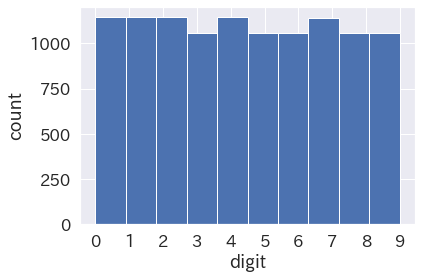

In [6]:
pd.Series(pendigits_y).plot(kind='hist', bins=10)
plt.xticks(range(10), range(10))
plt.xlabel('digit')
plt.ylabel('count')

In [7]:
n_clusters = np.unique(pendigits_y).size
n_features, n_clusters

(16, 10)

In [8]:
# normalize wine features
from sklearn.preprocessing import StandardScaler

normed_pendigits_X = StandardScaler().fit_transform(pendigits_X)

## PCA + k-Means

Text(0, 0.5, 'Accumulative Variance Ratio')

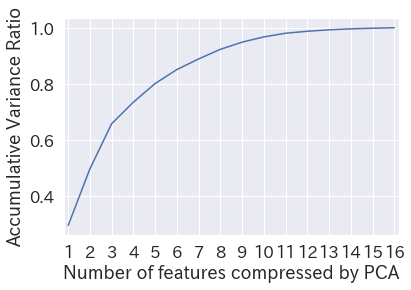

In [9]:
from sklearn.decomposition import PCA

# plot number of compressed features vs. Accumulative Variance Ratio
pca_full = PCA(n_components=n_features, random_state=14).fit(normed_pendigits_X)
plt.plot(range(1, n_features + 1), np.cumsum(pca_full.explained_variance_ratio_))
plt.xlim(1 - 0.2, n_features + 0.2)
plt.xticks(range(1, n_features + 1), range(1, n_features + 1))
plt.xlabel("Number of features compressed by PCA")
plt.ylabel("Accumulative Variance Ratio")

In [10]:
threshold_accum_var_ratio = 0.8
pca_n_features = int(np.nanmin(np.where(
    np.cumsum(pca_full.explained_variance_ratio_) > threshold_accum_var_ratio,
    range(1, n_features + 1),
    np.nan
)))
pca_n_features

5

In [11]:
# PCA decomposition
pca = PCA(n_components=pca_n_features, random_state=14)
pca_pendigits_X = pca.fit_transform(normed_pendigits_X)

In [12]:
# project it to a plane with t-SNE
from sklearn.manifold import TSNE

pca_tsne = TSNE(n_components=2, random_state=14)
plane_pendigits_X = pd.DataFrame(
    pca_tsne.fit_transform(normed_pendigits_X),
    columns=['x%02d' % x for x in range(1, 3)]
)

Text(0, 0.5, '')

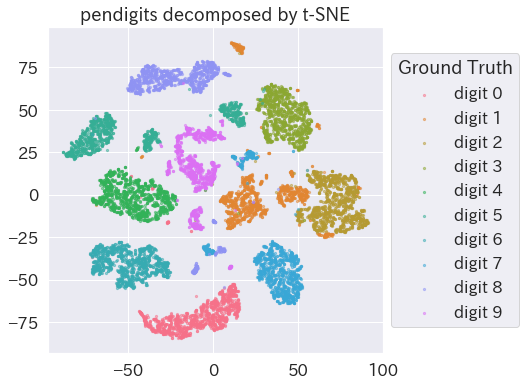

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for c in range(n_clusters):
    ax = plane_pendigits_X.loc[
        pendigits_y == c, :
    ].plot(
        kind='scatter', x='x01', y='x02', label=f'digit {c}', marker='.', alpha=0.5,
        color=sns.color_palette('husl', n_clusters + 1)[c], ax=ax
    )
plt.legend(title='Ground Truth', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('pendigits decomposed by t-SNE')
plt.xlabel(None)
plt.ylabel(None)

In [14]:
# k-Means with PCA
from sklearn.cluster import KMeans

normal_km = KMeans(n_clusters=10, init='k-means++', n_init=100, random_state=14)
normal_km_clusters = normal_km.fit_predict(normed_pendigits_X)
normal_km.n_iter_

31

Text(0, 0.5, '')

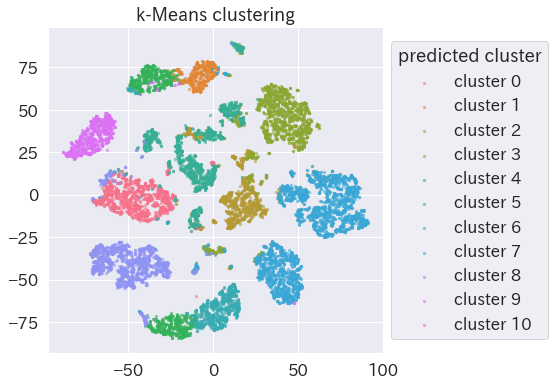

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for c in range(n_clusters + 1):
    ax = plane_pendigits_X.iloc[
        list(np.where(np.array(normal_km_clusters) == c)[0]), :
    ].plot(
        kind='scatter', x='x01', y='x02', label=f'cluster {c}', marker='.', alpha=0.5,
        color=sns.color_palette('husl', n_clusters + 1)[c], ax=ax
    )
plt.legend(title='predicted cluster', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('k-Means clustering')
plt.xlabel(None)
plt.ylabel(None)

In [16]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(pendigits_y, normal_km_clusters))

,0,1,2,3,4,5,6,7,8,9
0,8,0,1,0,436,1,641,8,48,0
1,2,0,642,84,0,83,0,328,4,0
2,0,0,7,4,0,0,0,1133,0,0
3,2,0,13,1037,0,2,0,1,0,0
4,1034,0,2,0,0,27,2,1,78,0
5,0,2,0,68,0,358,0,0,2,625
6,3,0,0,0,0,3,0,0,1049,1
7,4,1,106,130,0,0,0,891,6,4
8,0,422,25,55,439,14,25,46,18,11
9,81,1,115,15,0,835,8,0,0,0


In [17]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score

# NMI and AMI score
normal_nmi_score = normalized_mutual_info_score(pendigits_y, normal_km_clusters)
normal_ami_score = adjusted_mutual_info_score(pendigits_y, normal_km_clusters)
normal_nmi_score, normal_ami_score

(0.6958640921255674, 0.6953639493726739)

## search the best $k$

In [18]:
from time import perf_counter
from tqdm import tqdm
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from typing import List, Dict, Iterable


class ElbowLocator(KneeLocator):
    def __normalize(a: Iterable[float]) -> Iterable[float]:
        # invalidate
        return a


def evaluate_clustering(
    label: str,
    model: KMeans,
    X: np.ndarray,
    n_clusters_list: List[int]
) -> List[Dict]:
    results = list()
    inertias = list()
    sil_scores = list()
    cal_scores = list()
    for n_clusters in tqdm(n_clusters_list):
        start = perf_counter()
        km = model(
            n_clusters=n_clusters,
            init='k-means++',
            n_init=100,
            random_state=14
        )
        km.fit(X.copy(order='C'))
        end = perf_counter()
        if hasattr(km, 'cluster_dims_'):
            cluster_dims = km.cluster_dims_
        else:
            cluster_dims = 0
        sil_score = silhouette_score(X, km.labels_)
        cal_score = calinski_harabasz_score(X, km.labels_)
        inertias.append(km.inertia_)
        sil_scores.append(sil_score)
        cal_scores.append(cal_score)
        results.append({
            'label': label,
            'n_clusters': n_clusters,
            'elapsed_sec': end - start,
            'n_iter': km.n_iter_,
            'cluster_dims': cluster_dims,
            'inertia': km.inertia_,
            'silhouette_score': sil_score,
            'calinski_score': cal_score,
            'is_elbow_distortion': False,
            'is_knee_silhouette': False,
            'is_knee_calinski': False,
        })
    
    def seek_elbow(
        scores: List[float],
        curve: str,
        direction: str,
        label: str
    ) -> None:
        elbow = ElbowLocator(
            x=np.array(n_clusters_list).astype(float),
            y=np.array(scores),
            curve=curve, direction=direction
        )
        if elbow.knee is not None:
            results[
                np.where(np.array(n_clusters_list) == int(elbow.knee))[0][0]
            ][label] = True
        return
    
    seek_elbow(
        scores=inertias,
        curve='convex',
        direction='decreasing',
        label='is_elbow_distortion'
    )
    seek_elbow(
        scores=sil_scores,
        curve='concave',
        direction='increasing',
        label='is_knee_silhouette'
    )
    seek_elbow(
        scores=cal_scores,
        curve='concave',
        direction='increasing',
        label='is_knee_calinski'
    )
    return results

In [19]:
from subspacekmeans import SubspaceKMeans

results = list()
n_clusters_list = list(range(5, 21))

results.extend(
    evaluate_clustering(
        label='k-Means',
        model=KMeans,
        X=normed_pendigits_X,
        n_clusters_list=n_clusters_list
    )
)
results.extend(
    evaluate_clustering(
        label='PCA + k-Means',
        model=KMeans,
        X=pca_pendigits_X,
        n_clusters_list=n_clusters_list
    )
)
results.extend(
    evaluate_clustering(
        label='Subspace k-Means',
        model=SubspaceKMeans,
        X=normed_pendigits_X,
        n_clusters_list=n_clusters_list
    )
)
results.extend(
    evaluate_clustering(
        label='PCA + Subspace k-Means',
        model=SubspaceKMeans,
        X=pca_pendigits_X,
        n_clusters_list=n_clusters_list
    )
)
results = pd.DataFrame(results)

100%|██████████| 16/16 [06:43<00:00, 25.25s/it]


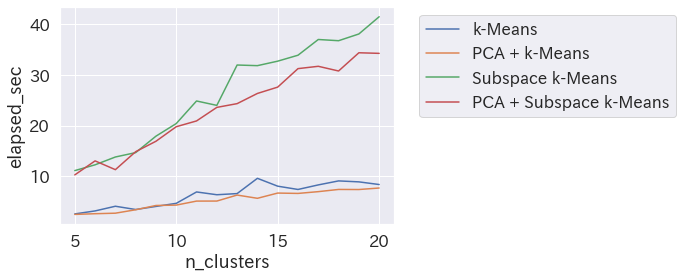

In [20]:
sns.lineplot(data=results, x='n_clusters', y='elapsed_sec', hue='label')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

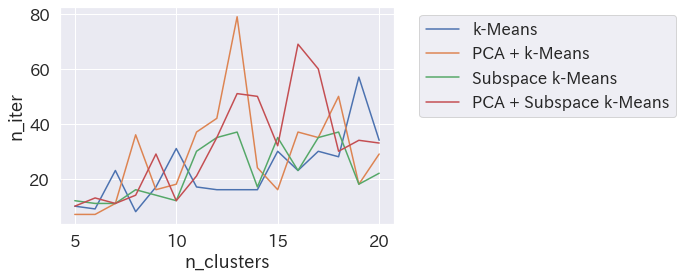

In [21]:
sns.lineplot(data=results, x='n_clusters', y='n_iter', hue='label')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

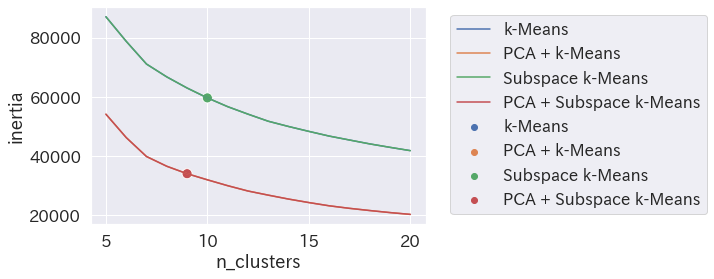

In [22]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(data=results, x='n_clusters', y='inertia', hue='label', ax=ax)
sns.scatterplot(
    data=results.loc[results['is_elbow_distortion'], :],
    x='n_clusters', y='inertia', hue='label', ax=ax, marker='o', s=100
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

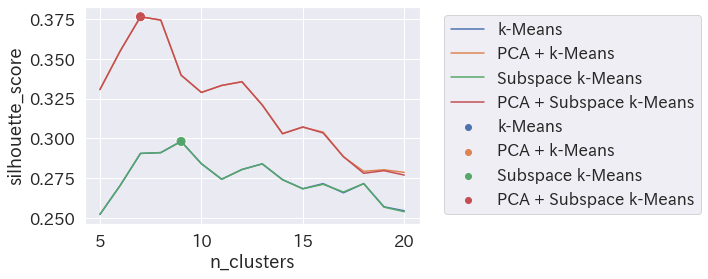

In [23]:
fix, ax = plt.subplots(1, 1)
sns.lineplot(data=results, x='n_clusters', y='silhouette_score', hue='label', ax=ax)
sns.scatterplot(
    data=results.loc[results['is_knee_silhouette'], :],
    x='n_clusters', y='silhouette_score', hue='label', ax=ax, marker='o', s=100
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

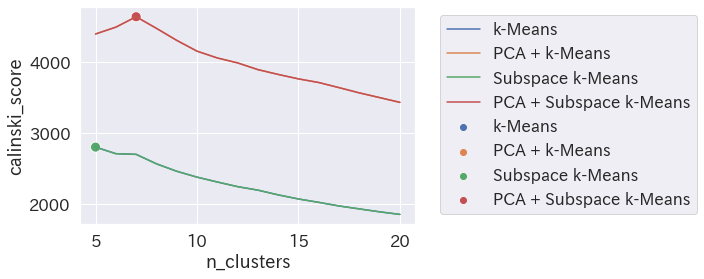

In [24]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(data=results, x='n_clusters', y='calinski_score', hue='label', ax=ax)
sns.scatterplot(
    data=results.loc[results['is_knee_calinski'], :],
    x='n_clusters', y='calinski_score', hue='label', ax=ax, marker='o', s=100
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

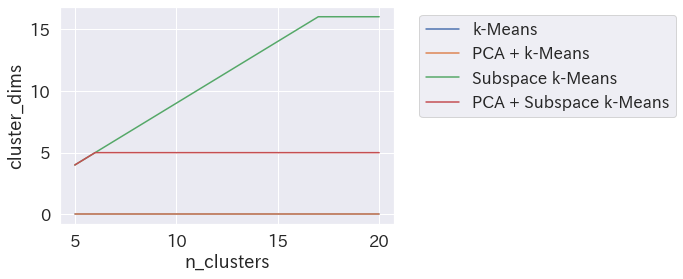

In [25]:
sns.lineplot(data=results, x='n_clusters', y='cluster_dims', hue='label')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

## Subspace k-Means

In [26]:
from subspacekmeans import SubspaceKMeans

subspace_km = SubspaceKMeans(n_clusters=n_clusters, random_state=14)
subspace_km_clusters = subspace_km.fit_predict(normed_pendigits_X)
subspace_km.n_iter_

25

In [27]:
# dimension of clustered-space
subspace_km.cluster_dims_

9

In [28]:
# transform original features and divide it into cluster-space and noise-space
transformed_pendigits_X = subspace_km.transform(normed_pendigits_X)
cluster_space = transformed_pendigits_X[:, :subspace_km.cluster_dims_]
noise_space = transformed_pendigits_X[:, subspace_km.cluster_dims_:]

In [29]:
# Visualize Noise-Space
cluster_tsne = TSNE(n_components=2, random_state=14)
cluster_plane = pd.DataFrame(
    cluster_tsne.fit_transform(cluster_space),
    columns=['x%02d' % x for x in range(1, 3)]
)

Text(0, 0.5, '')

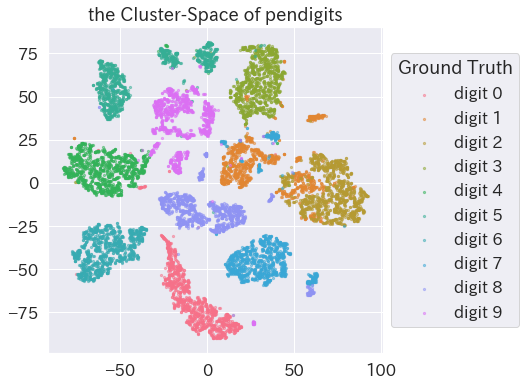

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for c in range(n_clusters):
    ax = cluster_plane.loc[
        np.array(pendigits_y) == c, :
    ].plot(
        kind='scatter', x='x01', y='x02', label=f'digit {c}', marker='.', alpha=0.5,
        color=sns.color_palette('husl', n_clusters + 1)[c], ax=ax
    )
plt.legend(title='Ground Truth', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('the Cluster-Space of pendigits')
plt.xlabel(None)
plt.ylabel(None)

Text(0, 0.5, '')

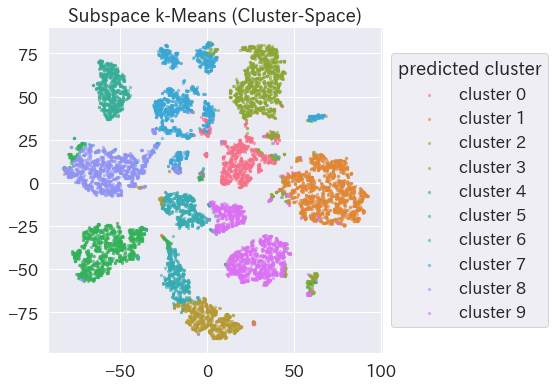

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for c in range(n_clusters):
    ax = cluster_plane.loc[
        np.array(subspace_km_clusters) == c, :
    ].plot(
        kind='scatter', x='x01', y='x02', label=f'cluster {c}', marker='.', alpha=0.5,
        color=sns.color_palette('husl', n_clusters + 1)[c], ax=ax
    )
plt.legend(title='predicted cluster', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Subspace k-Means (Cluster-Space)')
plt.xlabel(None)
plt.ylabel(None)

In [32]:
pd.DataFrame(confusion_matrix(pendigits_y, subspace_km_clusters))

,0,1,2,3,4,5,6,7,8,9
0,1,10,650,0,45,0,428,1,8,0
1,640,318,0,89,4,0,0,84,2,6
2,7,1124,0,7,0,0,0,0,0,6
3,13,1,0,1037,0,0,0,2,2,0
4,2,1,2,0,79,0,0,25,1035,0
5,0,0,0,56,3,627,0,369,0,0
6,0,1,0,0,1047,1,0,4,3,0
7,105,11,0,136,6,4,0,0,4,876
8,25,33,28,43,18,36,469,9,0,394
9,113,0,7,16,0,0,0,836,82,1


In [33]:
# Visualize Noise-Space
noise_tsne = TSNE(n_components=2, random_state=14)
noise_plane = pd.DataFrame(
    noise_tsne.fit_transform(noise_space),
    columns=['x%02d' % x for x in range(1, 3)]
)

Text(0, 0.5, '')

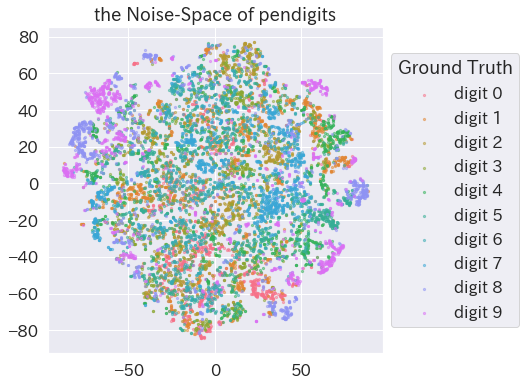

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for c in range(n_clusters):
    ax = noise_plane.loc[
        np.array(pendigits_y) == c, :
    ].plot(
        kind='scatter', x='x01', y='x02', label=f'digit {c}', marker='.', alpha=0.5,
        color=sns.color_palette('husl', n_clusters + 1)[c], ax=ax
    )
plt.legend(title='Ground Truth', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('the Noise-Space of pendigits')
plt.xlabel(None)
plt.ylabel(None)

Text(0, 0.5, '')

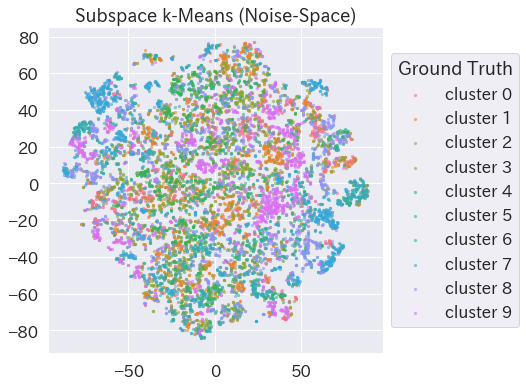

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for c in range(n_clusters):
    ax = noise_plane.loc[
        np.array(subspace_km_clusters) == c, :
    ].plot(
        kind='scatter', x='x01', y='x02', label=f'cluster {c}', marker='.', alpha=0.5,
        color=sns.color_palette('husl', n_clusters + 1)[c], ax=ax
    )
plt.legend(title='Ground Truth', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Subspace k-Means (Noise-Space)')
plt.xlabel(None)
plt.ylabel(None)

In [36]:
# NMI and AMI scores
subspace_nmi_score = normalized_mutual_info_score(pendigits_y, subspace_km_clusters)
subspace_ami_score = adjusted_mutual_info_score(pendigits_y, subspace_km_clusters)
subspace_nmi_score, subspace_ami_score

(0.711221887884398, 0.710754650223519)

In [37]:
# summary of scores
pd.DataFrame({
    'NMI': {
        'k-Means': normal_nmi_score,
        'Subspace k-Means': subspace_nmi_score,
    },
    'AMI': {
        'k-Means': normal_ami_score,
        'Subspace k-Means': subspace_ami_score,
    },
})

,NMI,AMI
k-Means,0.695864,0.695364
Subspace k-Means,0.711222,0.710755
